# Перцептрон для восприятия цифр
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[HSE][ML][MS][HW04] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

В этом задании вам предстоит реализовать классический перцептрон, немного улчшить его, и протестировать результат на классической задаче определния цифр по изображениям.

In [1]:
import numpy as np
from math import exp, log
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
import copy
from typing import NoReturn

In [27]:
def visualize(X, labels_true, labels_pred, w):
    unique_labels = np.unique(labels_true)
    unique_colors = dict([(l, c) for l, c in zip(unique_labels, [[0.8, 0., 0.], [0., 0., 0.8]])])
    plt.figure(figsize=(9, 9))

    if w[1] == 0:
        plt.plot([X[:, 0].min(), X[:, 0].max()], w[0] / w[2])
    elif w[2] == 0:
        plt.plot(w[0] / w[1], [X[:, 1].min(), X[:, 1].max()])  
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        pts = [[mins[0], -mins[0] * w[1] / w[2] - w[0] / w[2]],
               [maxs[0], -maxs[0] * w[1] / w[2] - w[0] / w[2]],
               [-mins[1] * w[2] / w[1] - w[0] / w[1], mins[1]],
               [-maxs[1] * w[2] / w[1] - w[0] / w[1], maxs[1]]]
        pts = [(x, y) for x, y in pts if mins[0] <= x <= maxs[0] and mins[1] <= y <= maxs[1]]
        x, y = list(zip(*pts))
        plt.plot(x, y, c=(0.75, 0.75, 0.75), linestyle="--")
    
    colors_inner = [unique_colors[l] for l in labels_true]
    colors_outer = [unique_colors[l] for l in labels_pred]
    plt.scatter(X[:, 0], X[:, 1], c=colors_inner, edgecolors=colors_outer)
    plt.show()

### Задание 1 (3 балла)
Для начала реализуем простой перцептрон.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [3]:
class Perceptron:
    def __init__(self, iterations: int = 100):
        """
        Parameters
        ----------
        iterations : int
        Количество итераций обучения перцептрона.

        Attributes
        ----------
        w : np.ndarray
        Веса перцептрона размерности X.shape[1] + 1 (X --- данные для обучения), 
        w[0] должен соответстовать константе, 
        w[1:] - коэффициентам компонент элемента X.

        Notes
        -----
        Вы можете добавлять свои поля в класс.
        
        """

        self.w = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> NoReturn:
        """
        Обучает простой перцептрон. 
        Для этого сначала инициализирует веса перцептрона,
        а затем обновляет их в течении iterations итераций.
        
        Parameters
        ----------
        X : np.ndarray
            Набор данных, на котором обучается перцептрон.
        y: np.ndarray
            Набор меток классов для данных.
        
        """
        raise NotImplementedError()
            
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Предсказывает метки классов.
        
        Parameters
        ----------
        X : np.ndarray
            Набор данных, для которого необходимо вернуть метки классов.
        
        Return
        ------
        labels : np.ndarray
            Вектор индексов классов 
            (по одной метке для каждого элемента из X).
        
        """
        raise NotImplementedError()

In [4]:
def softmax(predictions):
    '''
    Computes probabilities from scores
    Arguments:
      predictions, np array, shape is either (N) or (batch_size, N) -
        classifier output
    Returns:
      probs, np array of the same shape as predictions - 
        probability for every class, 0..1
    '''
    # TODO implement softmax
    predictions_ = predictions - np.max(predictions);
    probs = np.array(list(map(exp, predictions_)));
    probs = probs/sum(probs);
    return probs;
    raise Exception("Not implemented!")


def cross_entropy_loss(probs, target_index):
    '''
    Computes cross-entropy loss
    Arguments:
      probs, np array, shape is either (N) or (batch_size, N) -
        probabilities for every class
      target_index: np array of int, shape is (1) or (batch_size) -
        index of the true class for given sample(s)
    Returns:
      loss: single value
    '''
    # TODO implement cross-entropy
    #print("probs:", probs);
    
    return -log(probs[target_index - 1]);
    
    raise Exception("Not implemented!")

    

def softmax_with_cross_entropy(predictions, target_index):
    '''
    Computes softmax and cross-entropy loss for model predictions,
    including the gradient
    Arguments:
      predictions, np array, shape is either (N) or (batch_size, N) -
        classifier output
      target_index: np array of int, shape is (1) or (batch_size) -
        index of the true class for given sample(s)
    Returns:
      loss, single value - cross-entropy loss
      dprediction, np array same shape as predictions - gradient of predictions by loss value
    '''
    # TODO implement softmax with cross-entropy
    
    #One-dimension option
    
    if predictions.ndim == 1:
        predictions_ = predictions - np.max(predictions);
        dprediction = np.array(list(map(exp, predictions_)));
        summ = sum(dprediction);
        dprediction /= summ;
        
        loss = cross_entropy_loss(dprediction, target_index);
        dprediction[target_index - 1] -= 1;
        
        return loss, dprediction;
    else:
    
        predictions_ = predictions - np.max(predictions, axis = 1)[:, np.newaxis];
        exp_vec = np.vectorize(exp);
        #print("predictions_:", predictions_);
        
        dprediction = np.apply_along_axis(exp_vec, 1, predictions_);
        #print("dprediction before division: ", dprediction);
    
        summ = sum(dprediction.T);
        #print("summ: ", summ);
        dprediction /= summ[:, np.newaxis];
            
        #print("dprediction after division: ", dprediction);
    
        loss = np.array([cross_entropy_loss(x,y) for x,y in zip(dprediction, target_index)]);
        #print("loss: ", loss);
        
        #print("target_index - 1:", target_index - 1);
        it = np.nditer(target_index - 1, flags = ['c_index'] )
        while not it.finished:
            #print("it[0] = ", it[0]);
            dprediction[it.index, it[0]] -= 1
            it.iternext()
        
        dprediction /= len(target_index);
        #print("dprediction after subtraction: ", dprediction);
    
        return loss.mean(), dprediction;
    raise Exception("Not implemented!")

def l2_regularization(W, reg_strength):
    '''
    Computes L2 regularization loss on weights and its gradient
    Arguments:
      W, np array - weights
      reg_strength - float value
    Returns:
      loss, single value - l2 regularization loss
      gradient, np.array same shape as W - gradient of weight by l2 loss
    '''
    
    # TODO: implement l2 regularization and gradient
    loss = reg_strength*sum(sum(W**2));
    grad = reg_strength*2*W;
    
    return loss, grad
    #raise Exception("Not implemented!")


def linear_softmax(X, W, target_index):
    '''
    Performs linear classification and returns loss and gradient over W
    Arguments:
      X, np array, shape (num_batch, num_features) - batch of images
      W, np array, shape (num_features, classes) - weights
      target_index, np array, shape (num_batch) - index of target classes
    Returns:
      loss, single value - cross-entropy loss
      gradient, np.array same shape as W - gradient of weight by loss
    '''
    predictions = np.dot(X, W);
    loss, dZ = softmax_with_cross_entropy(predictions, target_index);
    dW = np.dot(X.T, dZ);
    
    # TODO implement prediction and gradient over W
    return loss, dW
    #raise Exception("Not implemented!")
    

class LinearSoftmaxClassifier():
    def __init__(self):
        self.W = None

    def fit(self, X, y, batch_size=100, learning_rate=1e-7, reg=1e-5,
            epochs=1):
        '''
        Trains linear classifier
        
        Arguments:
          X, np array (num_samples, num_features) - training data
          y, np array of int (num_samples) - labels
          batch_size, int - batch size to use
          learning_rate, float - learning rate for gradient descent
          reg, float - L2 regularization strength
          epochs, int - number of epochs
        '''

        num_train = X.shape[0]
        num_features = X.shape[1]
        num_classes = np.max(y)+1
        if self.W is None:
            self.W = 0.001 * np.random.randn(num_features, num_classes)

        loss_history = []
        for epoch in range(epochs):
            shuffled_indices = np.arange(num_train)
            np.random.shuffle(shuffled_indices)
            #print("shuffled_indeces:", shuffled_indices);
            
            sections = np.arange(batch_size, num_train, batch_size)
            batches_indices = np.array_split(shuffled_indices, sections)
            
            #print("bathes_indeces:", batches_indices);
            #print(num_train, num_features, num_classes);
            
            # TODO implement generating batches from indices
            # Compute loss and gradients
            # Apply gradient to weights using learning rate
            # Don't forget to add both cross-entropy loss
            # and regularization!
            for batch in batches_indices:
                #print("y[batch]:", y[batch]);
                lin = linear_softmax(X[batch,:], self.W, y[batch]+1);
                l2 = l2_regularization(self.W, reg);
                loss, grad = lin[0] + l2[0], lin[1] + l2[1]
                loss_history.append(loss);
                self.W -= learning_rate*grad;
            if abs(loss_history[-1] - loss_history[-len(sections)]) < 1e-5:
                    print("Interrupt cycle of epochs(on epoch %i) for reason small difference losses between fit batches: %f" % (epoch, loss));
                    return loss_history;
            # end
            #print("Epoch %i, loss: %f" % (epoch, loss), end = '\r');
        print("End epohs, loss_last: %f" % loss);
        return loss_history
        #raise Exception("Not implemented!")

    def predict(self, X):
        '''
        Produces classifier predictions on the set
       
        Arguments:
          X, np array (test_samples, num_features)
        Returns:
          y_pred, np.array of int (test_samples)
        '''
        y_pred = np.zeros(X.shape[0], dtype=int)
        predictions = np.dot(X, self.W)
        
        i=0;
        for predict in predictions:
            values = [softmax_with_cross_entropy(predict, target_index + 1)[0] \
                        for target_index in range(self.W.shape[1])];
            y_pred[i] = min(range(len(values)), key=values.__getitem__);
            i += 1;
        
        return y_pred

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

In [20]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
print(true_labels[:10])
print(X[:5])

[1 1 1 1 1 0 1 0 1 0]
[[ 3.03916577  3.33148572]
 [ 3.20257399  0.69153104]
 [ 3.84297324  3.00733553]
 [ 2.57470691  3.03927437]
 [-0.26326023  3.54539901]]


End epohs, loss_last: 0.691745


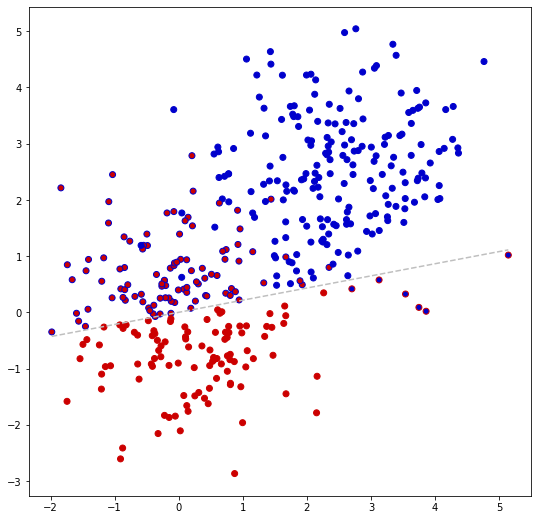

In [22]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = LinearSoftmaxClassifier()
c.fit(X, true_labels)
w = np.array([0, c.W[0, 1] - c.W[0, 0], c.W[1, 1] - c.W[1, 0]])
visualize(X, true_labels, np.array(c.predict(X)), w)

End epohs, loss_last: 0.692539


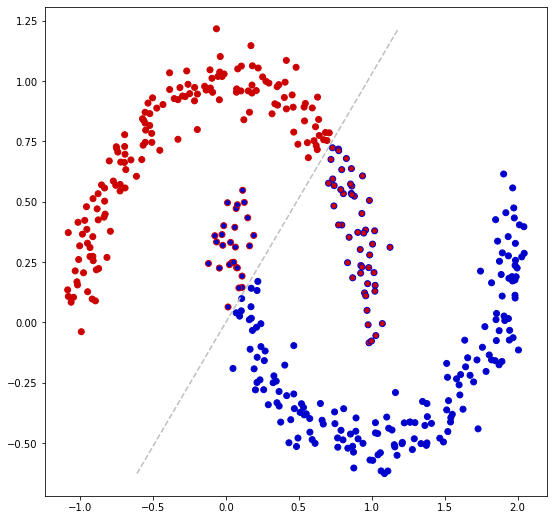

In [23]:
X, true_labels = make_moons(400, noise=0.075)
c = LinearSoftmaxClassifier()
c.fit(X, true_labels)
w = np.array([0, c.W[0, 1] - c.W[0, 0], c.W[1, 1] - c.W[1, 0]])
visualize(X, true_labels, np.array(c.predict(X)), w)

### Задание 2 (2 балл)
Проблема обычной реализации перцептрона в том, что закончить его обучение мы можем с неоптимальными весами, т.к. точность разбиения в зависимости от числа итераций не растет монотонно. Чтобы этого избежать, мы можем оставлять в конце веса той итерации, на которой мы лучше всего разбивали множество `X`.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. В конце обучения оставляет лучшие веса. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [ ]:
class PerceptronBest:

    def __init__(self, iterations: int = 100):
        """
        Parameters
        ----------
        iterations : int
        Количество итераций обучения перцептрона.

        Attributes
        ----------
        w : np.ndarray
        Веса перцептрона размерности X.shape[1] + 1 (X --- данные для обучения), 
        w[0] должен соответстовать константе, 
        w[1:] - коэффициентам компонент элемента X.

        Notes
        -----
        Вы можете добавлять свои поля в класс.
        
        """

        self.w = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> NoReturn:
        """
        Обучает перцептрон.

        Для этого сначала инициализирует веса перцептрона, 
        а затем обновляет их в течении iterations итераций.

        При этом в конце обучения оставляет веса, 
        при которых значение accuracy было наибольшим.
        
        Parameters
        ----------
        X : np.ndarray
            Набор данных, на котором обучается перцептрон.
        y: np.ndarray
            Набор меток классов для данных.
        
        """
        raise NotImplementedError()
            
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Предсказывает метки классов.
        
        Parameters
        ----------
        X : np.ndarray
            Набор данных, для которого необходимо вернуть метки классов.
        
        Return
        ------
        labels : np.ndarray
            Вектор индексов классов 
            (по одной метке для каждого элемента из X).
        
        """
        raise NotImplementedError()

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

In [ ]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

In [ ]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 3 (1 балл)
Реализуйте метод `transform_images(images)`, который преобразует изображения в двумерные векторы. Значение компонент векторов придумайте сами и напишите в виде комментария к методу.

In [7]:
def transform_images(images: np.ndarray) -> np.ndarray:
    """
    Переводит каждое изображение в вектор из двух элементов.

    Использует 2 заранее заданных ядра -- kernel1 и kernel5.
    Ядро состоит из 0 и 1.
    К каждой картинке применяется ядро:
        1. Покомпонентное умножение значений картинки на значение ядра
        2. Значение признака -- среднее получившегося умножения
    Интуитивно, смотрим по маске соответствие пикселей нужному числу.
        
    Parameters
    ----------
    images : numpy.ndarray
        Трехмерная матрица с черное-белыми изображениями.
        Её размерность: (n_images, image_height, image_width).

    Return
    ------
    numpy.ndarray
        Двумерная матрица с преобразованными изображениями.
        Её размерность: (n_images, 2).
    """
    bs, h, w = images.shape
    kernel1 = np.array([
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
    ])
    kernel5 = np.array([
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
    ])
    result = np.empty((bs, 2))
    result[:, 0] = (images * kernel1).mean(axis=(1, 2))
    result[:, 1] = (images * kernel5).mean(axis=(1, 2))
    return result

def get_digits(y0=1, y1=5):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    mask = np.logical_or(labels == y0, labels == y1)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = transform_images(images)
    return X, labels

### Задание 4 (4 балла)
Теперь посмотрим на точность обычного перцептрона и перцептрона выбором лучшей итерации. Для тестирования будем использовать цифры 1 и 5. Необходимо использовать реализованное выше преобразование, т.е. только векторы из 2х признаков. 

Оценка за это задание выставляется следующим образом:
1. 1 балл - что-то обучается, картинки рисуются
2. 2 балла - точность хотя бы одного из классификаторов на тестовой выборке больше 80%
3. 4 балла - точность хотя бы одного из классификаторов на тестовой выборке больше 90%

__Обратите внимание, что перцептрон детерминирован, а выборка должна разбиваться без перемешивания__

In [8]:
X, y = get_digits()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [ ]:
c = PerceptronBest(iterations=100000)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

А теперь посчитаем среднюю точность по всем возможным парам цифр

In [ ]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = Perceptron(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

In [ ]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = PerceptronBest(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))